In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Flatten, Dropout
from keras.layers import Conv1D, GlobalMaxPooling1D

Using TensorFlow backend.


In [2]:
max_features = 20000
text_max_words = 200

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [4]:
x_val = x_train[max_features:]
y_val = y_train[max_features:]
x_train = x_train[:max_features]
y_train = y_train[:max_features]

In [5]:
x_train = sequence.pad_sequences(x_train, maxlen=text_max_words)
x_val = sequence.pad_sequences(x_val, maxlen=text_max_words)
x_test = sequence.pad_sequences(x_test, maxlen=text_max_words)

In [6]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=text_max_words))
model.add(Dropout(0.2))
model.add(Conv1D(256,
                 3,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

W0810 06:52:45.817467 139983435064960 deprecation_wrapper.py:119] From /home/gonapps/.local/share/virtualenvs/keras-hryKYpEs/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0810 06:52:45.861347 139983435064960 deprecation_wrapper.py:119] From /home/gonapps/.local/share/virtualenvs/keras-hryKYpEs/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0810 06:52:45.868027 139983435064960 deprecation_wrapper.py:119] From /home/gonapps/.local/share/virtualenvs/keras-hryKYpEs/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0810 06:52:45.913190 139983435064960 deprecation_wrapper.py:119] From /home/gonapps/.local/share/virtualenvs/keras-hryKYpEs/lib/python3.7/site-packages/ke

In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

W0810 06:52:49.269876 139983435064960 deprecation_wrapper.py:119] From /home/gonapps/.local/share/virtualenvs/keras-hryKYpEs/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0810 06:52:49.387679 139983435064960 deprecation_wrapper.py:119] From /home/gonapps/.local/share/virtualenvs/keras-hryKYpEs/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0810 06:52:49.402691 139983435064960 deprecation.py:323] From /home/gonapps/.local/share/virtualenvs/keras-hryKYpEs/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
hist = model.fit(x_train, y_train, epochs=25, batch_size=64, validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/25
20000/20000 [==============================] - 75s 4ms/step - loss: 0.0865 - acc: 0.9721 - val_loss: 0.3045 - val_acc: 0.8920
Epoch 2/25
20000/20000 [==============================] - 71s 4ms/step - loss: 0.0231 - acc: 0.9945 - val_loss: 0.3557 - val_acc: 0.8926
Epoch 3/25
20000/20000 [==============================] - 71s 4ms/step - loss: 0.0061 - acc: 0.9993 - val_loss: 0.4005 - val_acc: 0.8922
Epoch 4/25
20000/20000 [==============================] - 70s 3ms/step - loss: 0.0019 - acc: 0.9997 - val_loss: 0.4417 - val_acc: 0.8914
Epoch 5/25
20000/20000 [==============================] - 72s 4ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.4744 - val_acc: 0.8900
Epoch 6/25
20000/20000 [==============================] - 69s 3ms/step - loss: 4.9612e-04 - acc: 1.0000 - val_loss: 0.4950 - val_acc: 0.8926
Epoch 7/25
20000/20000 [==============================] - 69s 3ms/step - loss: 4.3020e-04 - acc: 1.0000 - val_loss: 0.5061 - 

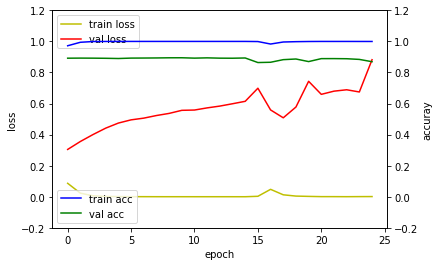

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([-0.2, 1.2])
acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([-0.2, 1.2])
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

In [12]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

25000/25000 [==============================] - 18s 732us/step
## evaluation loss and_metrics ##
[0.9680549689674377, 0.8574000000190735]
